In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [11]:
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]]).T
Y= np.array([ 1, -1, -1, -1]).T

In [12]:
def initial_params():
    W = np.random.rand(2,1)
    b=0
    initial_param = {'W':W , 'b': b}
    return initial_param

In [13]:
def forward_prop(X,param):
    W = param['W']
    b = param['b']
    Z = np.dot(W.T, X) + b
    A = 1 / (1 + np.exp(-Z))
    cache = { 'W':W, 'b':b, 'Z':Z}
    return A, cache

In [14]:
def compute_costs(X,Y,A):
    m = X.shape[0]
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A)) 
    return cost

In [15]:
def back_prop(X,A,Y,cache):
    m = X.shape[0]
    dZ = A - Y
    W = cache['W']
    b = cache['b']
    dW = 1/m * np.dot( X, dZ.T)
    db = 1/m * np.sum( dZ , axis=1, keepdims=True)
    grad = { 'dW':dW, 'db': db}
    return grad

In [16]:
def param_update(param,grad,learning_rate):
    W = param['W']
    b = param['b']
    dW = grad['dW']
    db = grad['db']
    W = W - learning_rate * dW
    b = b - learning_rate * db
    param['W'] =W
    param['b'] =b 
    return param

In [17]:
def train_model(X,Y,param,learning_rate,num_iterations):
    Cost = []
    for i in range(num_iterations):
        A,cache = forward_prop(X,param)
        cost = compute_costs(X,Y,A)
        grad = back_prop(X,A,Y,cache)
        param =param_update(param,grad,learning_rate)
        Cost.append(cost)
    return param,Cost

In [18]:
num_iterations= 500
learning_rate=0.01
initial_param = initial_params()
param,Cost =train_model(X,Y,initial_param,learning_rate,num_iterations)

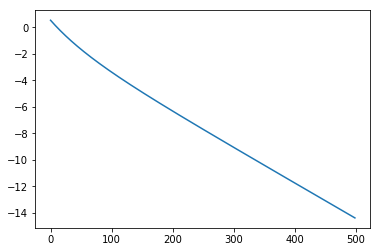

In [19]:
l = [i for i in range(500)]
plt.plot(l,Cost)

In [20]:
def predict(X,param):
    A,_ = forward_prop(X,param)
    return A

In [28]:
X_test = [1,0]
y_hat = predict(X_test, param)
pred =  y_hat > 0.5
int(pred)

0

In [23]:
param

{'W': array([[4.06543977],
        [3.7389363 ]]), 'b': array([[-7.14607376]])}

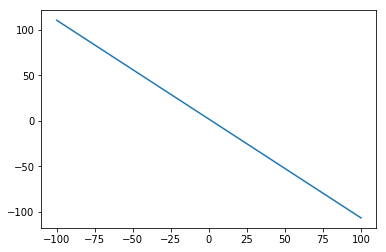

In [25]:
# decision boundary pictorial view
x2 = np.linspace(-100,100)
x1 = np.linspace( -100, 100)
x2 = (7.15 - 4.07*x1) / 3.74 
plt.plot(x1,x2)